## Standard Imports

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


## Imports from a custom module

As you carry out your own analyses, probably build up a library of code that you'll want to reuse. Rather than copying and pasting the same text over and over again into your Jupyter notebooks, you can create your own custom Python modules. To make such modules available to work with you'll need to place them in the same directory as your Jupyter notebooks (if you're working with Python installed locally on your computer there are other ways to organize your custom modules, but we won't discuss those for the purpose of this class).  

Download the `statspot.py` module from http://roybatty.org/statplots.py and upload it (via the "Upload" button on the Jupyter home page) to the same directory as your notebooks.


In [2]:
import statplots

# Comparing Samples, Sampling Distribution of the Sample Mean and Confidence Intervals

I want to emphasize the difference between sample distributions and the sampling distribution of the sample mean, and re-emphasize how these distributions relate to  confidence intervals for the mean.

To do so, we'll illustrate these different concepts with the "butterfat" data set we've used in previous lectures.

In [3]:
fat = pd.read_csv("http://roybatty.org/butterfat.csv")
print(fat.describe())

mean_fat = fat.butterfat.mean()
std_fat = fat.butterfat.std()
SE_fat = std_fat / np.sqrt(fat.butterfat.count())

        butterfat
count  120.000000
mean     4.166083
std      0.302381
min      3.470000
25%      3.967500
50%      4.145000
75%      4.342500
max      5.000000


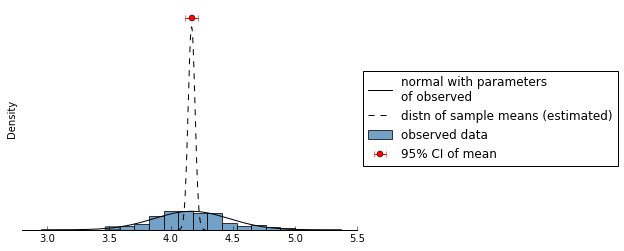

In [4]:
plt.hist(fat.butterfat, bins=13, normed=True, 
         color='steelblue', alpha=0.75, label="observed data")

dist1, ax1 = statplots.norm_plot(mean_fat, std_fat, color='k',
                       label="normal with parameters\nof observed")

dist2, ax2 = statplots.norm_plot(mean_fat, SE_fat, color='k', linestyle='dashed',
                       label="distn of sample means (estimated)")
plt.xlim(2.8,5.5)
maxy = ax2.get_ylim()[1]
plt.errorbar(mean_fat, 0.95 * maxy, xerr=1.96 * SE_fat, fmt='ro', label='95% CI of mean')
plt.legend(numpoints=1,loc='center left', bbox_to_anchor=(1, 0.5))
pass



# Interpretting Confidence Intervals
You should be careful in interpretting confidence intervals.
The correct interpretation is wording like:

    We are XX% confident that the population parameter is between...
    
    
## Which is the right interpretation of the CI?

￼A random sample of 50 college students were asked how many exclusive relationships they have been in so far. This sample yielded a mean of 3.2 and a standard deviation of 1.74. Estimate the true average number of exclusive relationships using this sample.

The 95% confidence interval for the mean is defined as:
$$
\overline{x} \pm 1.96 \times SE
$$

We calculate the sample standard error as:
$$
{SE} = \frac{s}{\sqrt{n}} = \frac{1.74}{\sqrt{50}} = 0.246
$$

So our approximate 95% CI for the mean is: 
$$3.2 \pm 1.96 \times 0.246 = (2.72, 3.68) \approx (2.7, 3.7)$$.

Which of the following is the correct interpretation of this CI?
  * (a) the average number of exclusive relationships college students in this sample have been in is between 2.7 and 3.7.
  * (b) college students on average have been in between 2.7 and 3.7 exclusive relationships.
  * (c) a randomly chosen college student has been in 2.7 to 3.7 exclusive relationships.
  * (d) 95% of college students have been in 2.7 to 3.7 exclusive relationships.


# Sampling Distribution of the Sample Mean for Non-normal Underlying Distributions

Up to now, in our discussions of sampling distributions, standard errors, and confidence intervals, our simulations have involved drawing samples from populations that are normally distributed.  We found that the sampling distribution of the sample mean is itself normally distributed.

What would happen if we changed our underlying distribution to something that was *not* normally distributed?  

Let's explore this issue by simulating sampling distributions drawn from two decidely non-normal distributions -- uniform and exponential.


### Uniform distribution

In a uniform distribution, all possible outcomes are equally likely. A continuous uniform distribution is usually defined in terms of the the interval $(a,b)$ giving the upper and lower limits of the possible outcomes, with the mean  $\mu = \frac{1}{2}(a+b)$ and standard deviation $\sigma = \sqrt{\frac{1}{12}(b-a)^2}$

When specifying a uniform distribution using the `scipy.stats` module the `loc` argument is the lower limit ($a$) and the `scale` argument is the with of the distribution, such that the upper limit, $b$ is equal to `loc + scale`.

In [5]:
# U(2,6)
uni = stats.uniform(loc=2, scale=4)
true_mean, true_var = uni.stats(moments='mv')
true_std = np.sqrt(true_var)

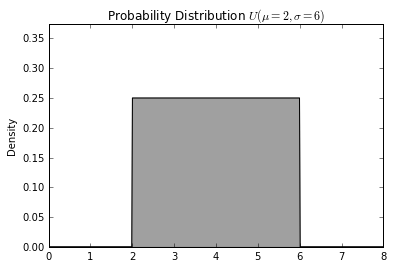

In [6]:
# plot uniform distribution
x = np.linspace(0,8, 500)
density = uni.pdf(x)
plt.plot(x, density, color='black')
plt.ylim(0, max(density)*1.5)
plt.fill_between(x, density, color='gray', alpha=0.75)
plt.ylabel("Density")
plt.title("Probability Distribution $U(\mu=2,\sigma=6)$")
pass

In [7]:
# draw 1000 samples with n = 50 and = 200 from the uniform and calculate sample means
n1, n2 = 50, 250

usamples1 = uni.rvs(size = (n1,1000))
usamples2 = uni.rvs(size = (n2,1000))

umeans1 = usamples1.mean(axis = 0)
umeans2 = usamples2.mean(axis = 0)


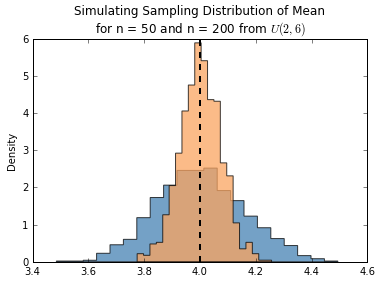

In [8]:
# plot resulting sampling distribution

plt.hist(umeans1, bins=21, histtype='stepfilled',
         color='steelblue', alpha=0.75, normed=True)
plt.hist(umeans2, bins=21, histtype='stepfilled',
         color='sandybrown', alpha=0.75, normed=True)

# draw vertical line at mean of underlying distn
ymax = plt.gca().get_ylim()[1]  # find upper y limit of current plot axis
plt.vlines(true_mean, 0, ymax, 
           color='black', linestyle='dashed', linewidth=2)

plt.ylabel("Density")
plt.title("Simulating Sampling Distribution of Mean\nfor n = 50 and n = 200 from $U(2,6)$")
pass

In [9]:
SE_u1 = np.std(umeans1, ddof=1)
SE_u2 = np.std(umeans2, ddof=1)

print("Simulated standard error of sample mean for n = 50:", SE_u1)
print("Expected standard error of sample mean for n = 50:", true_std/np.sqrt(n1))
print()
print("Simulated standard error of sample mean for n = 200:", SE_u2)
print("Expected standard error of sample mean for n = 200:", true_std/np.sqrt(n2))


Simulated standard error of sample mean for n = 50: 0.15749090439
Expected standard error of sample mean for n = 50: 0.163299316186

Simulated standard error of sample mean for n = 200: 0.0739468343639
Expected standard error of sample mean for n = 200: 0.073029674334


### Exponential Distribution

Let's carry out a similar simulation where the underlying distribution is exponential (we'll discuss the exponential in  detail in an upcoming lecture).

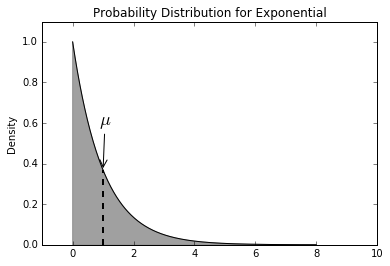

In [10]:
# define exponential distribution
expondistn = stats.expon(loc=0,scale=1)
etrue_mean, etrue_var = expondistn.stats(moments='mv')
etrue_std = np.sqrt(etrue_var)

# plot uniform distribution
x = np.linspace(0,8, 500)
density = expondistn.pdf(x)
plt.plot(x, density, color='black')
plt.ylim(0, max(density)*1.1)
plt.xlim(-1,10)
plt.fill_between(x, density, color='gray', alpha=0.75)

plt.vlines(etrue_mean, 0, expondistn.pdf(etrue_mean), 
           color='black', linestyle='dashed', linewidth=2)

plt.annotate("$\mu$", xy=(etrue_mean, expondistn.pdf(etrue_mean)),
             xytext=(2,40),
             textcoords='offset points',
             horizontalalignment="center",
             verticalalignment="bottom",
             fontsize=18,
             arrowprops=dict(arrowstyle="->",color='black'))

plt.ylabel("Density")
plt.title("Probability Distribution for Exponential")
pass

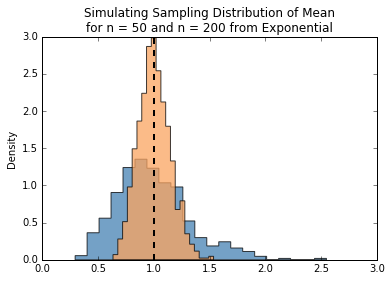

In [11]:
# draw 1000 samples with n = 10 and = 50 from the exponential and calculate sample means
n1, n2 = 10, 50

esamples1 = expondistn.rvs(size = (n1,1000))
esamples2 = expondistn.rvs(size = (n2,1000))

emeans1 = esamples1.mean(axis = 0)
emeans2 = esamples2.mean(axis = 0)

# plot resulting sampling distribution

plt.hist(emeans1, bins=21, histtype='stepfilled',
         color='steelblue', alpha=0.75, normed=True)
plt.hist(emeans2, bins=21, histtype='stepfilled',
         color='sandybrown', alpha=0.75, normed=True)

# draw vertical line at mean of underlying distn
ymax = plt.gca().get_ylim()[1]  # find upper y limit of current plot axis
plt.vlines(etrue_mean, 0, ymax, 
           color='black', linestyle='dashed', linewidth=2)

plt.ylabel("Density")
plt.title("Simulating Sampling Distribution of Mean\nfor n = 50 and n = 200 from Exponential")
pass

In [12]:
SE_e1 = np.std(emeans1, ddof=1)
SE_e2 = np.std(emeans2, ddof=1)

print("Simulated standard error of sample mean for n = 10:", SE_e1)
print("Expected standard error of sample mean for n = 10:", true_std/np.sqrt(n1))
print()
print("Simulated standard error of sample mean for n = 50:", SE_e2)
print("Expected standard error of sample mean for n = 50:", true_std/np.sqrt(n2))

Simulated standard error of sample mean for n = 10: 0.325782277641
Expected standard error of sample mean for n = 10: 0.36514837167

Simulated standard error of sample mean for n = 50: 0.142360871405
Expected standard error of sample mean for n = 50: 0.163299316186


# Central Limit Theorem

You can keep doing simulation experiments like the ones above with arbitrary distributions (discrete or continuous) that have well defined means ($\mu$) and finite standard deviations ($\sigma$).  What you will find is that **regardless of the shape of the underlying distribution** the *sampling distribution of the mean* will, as $n$ gets large, converge to a normal distribution that has mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

This surprising and observation is a manifestation of  the **Central Limit Theorem** (CLT).

Here's a concise definition of the CLT from a [nice web resource on probability from the University of Utah](http://www.math.uah.edu/stat/sample/CLT.html):

> Roughly, the central limit theorem states that the distribution of the average (or sum) of a large number of independent, identically distributed variables will be approximately normal, regardless of the underlying distribution.

The CLT is one reason that so real-world random process have probability distributions that are approximately normal.  We'll revisit the CLT in various forms in later lectures.